### Guided Practice: Logit Function and Odds

In [3]:
import numpy as np
import pandas as pd

In [4]:
def logit_func(odds):
    # uses at float (odds) and returns the log odds (logit)

    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1./(1-np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [5]:
for odd in odds_set:
    print sigmoid_func(logit_func(odd))

1.25
1.05263157895
11.0
2.25
2.66666666667


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [7]:


df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [8]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [34]:
df = df.join(pd.get_dummies(df['rank']))

In [10]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [39]:
X = df[['gre', 'gpa', 1, 2, 3]]
y = df['admit']
lm = LogisticRegression(C=10**6)
lm.fit(X,y)


LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [40]:
import numpy as np

In [41]:
print df.columns[1:-1]
print lm.coef_
print lm.intercept_
print df.admit.mean()

Index([u'gre', u'gpa', u'rank', 1, 2, 3], dtype='object')
[[ 0.00226262  0.79341001  1.55050653  0.87105493  0.21009975]]
[-5.50087714]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

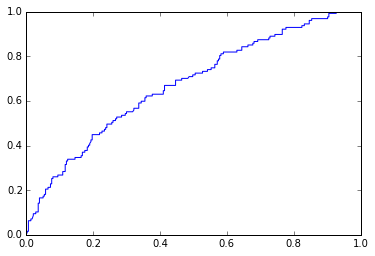

In [75]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

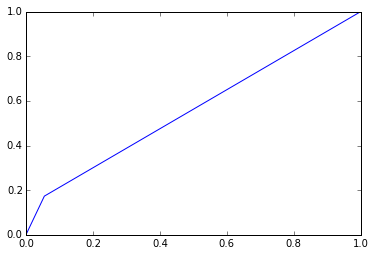

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

## Question 1

In [13]:
train_df = pd.read_csv('../../assets/dataset/titanic.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [15]:
train_df.describe() #Let's take a look at the quality of our data.  Ah, some missing values in Age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df.isnull().sum() #and in cabin.  Age we can fill missing values.  Cabin looks messy

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [32]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

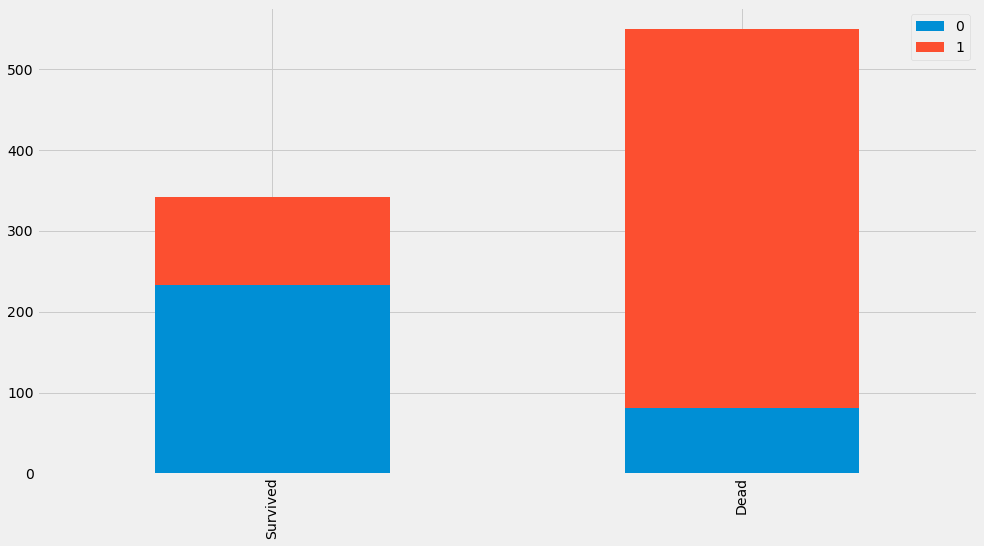

In [18]:
survived_gender = train_df[train_df['Survived']== 1]['Sex'].value_counts()
dead_gender = train_df[train_df['Survived']== 0]['Sex'].value_counts()
survival_df = pd.DataFrame([survived_gender, dead_gender])
survival_df.index = ['Survived','Dead']
survival_df.plot(kind='bar',stacked=True,figsize=(15,8))

'Women and children first'? Is that how things went down? Women seem to show a much higher survival rate than men, so that should be the starting point for our model. Let's probe age a bit further.

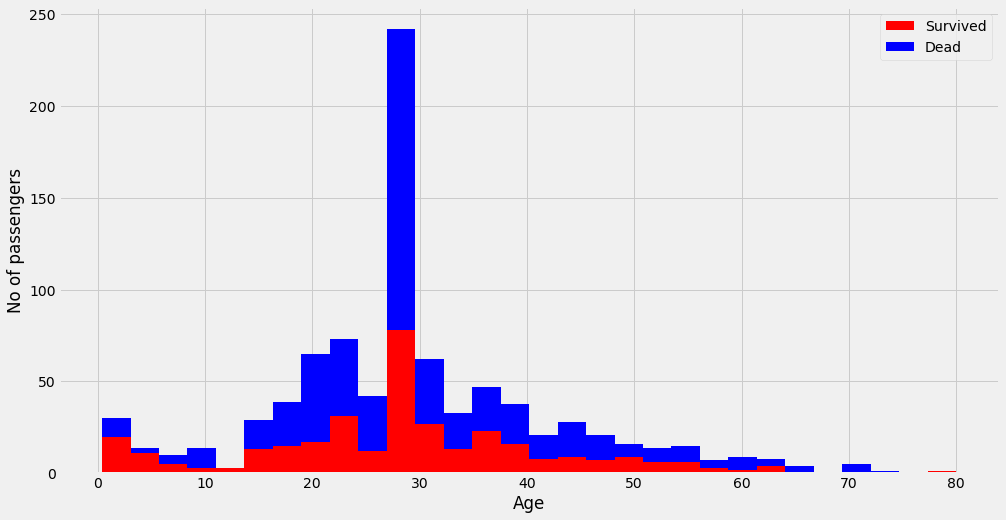

In [30]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], stacked=True, color = ['r','b'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

So passengers younger than ten have a higher likelihood of survival. The median age was 28 before we feature engineered the ages a little so that threshold should not have been affected too much by our feature engineering.

## Conclusions in answer to Question 1

For the Titanic dataset, accuracy can be delivered at a fairly high rate through simply leveraging the different survival rates of male vs female if the Gender column is suitably dummified.  

The age column in the Titanic dataset has around 177 missing values,  which if filled by the mean age or median for the whole dataset can lead to lower insights than if the data is suitably stratified and the median used to fill NANs for groups segmented on age and economic class.  This yields a much higher accuracy rate on classification from training set to test set.  Male survivability in 3rd class cabins up to the age of about 39 is worse than equivalent age groups among 1st class cabin occupants, for example.

## Question 2

When building a classification model, the accuracy of the model as the number of correct predictions from predictions made will be the most critical metric.

In the case of a binary classifier such as predicting survival on the Titanic, however, our understanding can be supplemented by considerations of recall and precision, particularly if we are trying to tune the model further.  In other contexts, such as if we were seeking to try to establish via machine learning if a tumor in a cancer patient was benign or malignant, false positive and false negative rates (identifying a malignant tumor in a patient when one is not present, and incorrectly identifying a malignant tumor in a patient as benign respectively) have higher ethical stakes.  In this case, we might only be concerned with how close we are getting to ground truth.

## Question 3

